In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
import numpy as np
y_train[0]#integers output
np.unique(np.array(y_train))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_train.shape

(50000, 10)

(-0.5, 31.5, 31.5, -0.5)

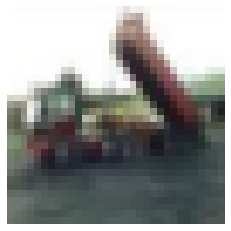

In [6]:
plt.imshow(x_train[2],interpolation="nearest")
plt.axis("off")

In [7]:
from tensorflow.keras import models,layers,initializers
he_init=initializers.VarianceScaling()

In [8]:
from tensorflow.keras import regularizers
l1_l2=regularizers.l1_l2()

In [9]:
model=models.Sequential()

In [10]:
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),strides=2,kernel_regularizer=l1_l2,activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu",kernel_regularizer=l1_l2,kernel_initializer=he_init))
model.add(layers.Dropout(rate=0.5))      
model.add(layers.Dense(10,activation="relu"))

In [12]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
x_val=x_train[:15000]
y_val=y_train[:15000]
x_train_partial=x_train[15000:]
y_train_partial=y_train[15000:]

In [14]:
import tensorflow as tf

In [16]:
with tf.device("/gpu:0"):
    history=model.fit(x_train_partial,y_train_partial,batch_size=128,epochs=20,validation_data=[x_val,y_val],verbose=0)

In [17]:
data=history.history

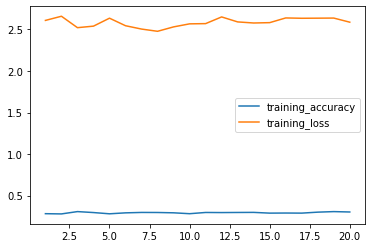

In [19]:
plt.plot(range(1,21),data['accuracy'],label="training_accuracy")
plt.plot(range(1,21),data['loss'],label="training_loss")
plt.legend()

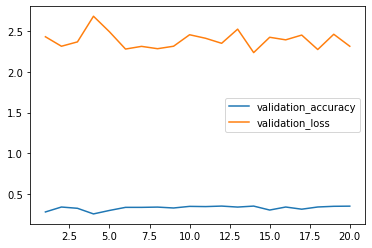

In [20]:
plt.plot(range(1,21),data['val_accuracy'],label="validation_accuracy")
plt.plot(range(1,21),data['val_loss'],label="validation_loss")
plt.legend()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [22]:
model.save("cifar10.h5")

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
train_dataflow=ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True,rotation_range=90)
val_dataflow=ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True,rotation_range=90)

In [28]:
train_gen=train_dataflow.flow(x_train_partial,y_train_partial,batch_size=350)
val_gen=val_dataflow.flow(x_val,y_val,batch_size=300)

In [32]:
from tensorflow.keras.models import load_model
model2=load_model("cifar10.h5")

In [34]:
with tf.device("/gpu:0"):
    history=model2.fit_generator(train_gen,steps_per_epoch=100,epochs=30,validation_data=val_gen,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 25s 253ms/step - loss: 2.6147 - accuracy: 0.1959 - val_loss: 2.4804 - val_accuracy: 0.2452
Epoch 2/30
100/100 [==============================] - 25s 246ms/step - loss: 2.6029 - accuracy: 0.2055 - val_loss: 2.4864 - val_accuracy: 0.2466
Epoch 3/30
100/100 [==============================] - 24s 245ms/step - loss: 2.5661 - accuracy: 0.2271 - val_loss: 2.4535 - val_accuracy: 0.2675
Epoch 4/30
100/100 [==============================] - 25s 245ms/step - loss: 2.5937 - accuracy: 0.2226 - val_loss: 2.4859 - val_accuracy: 0.2773
Epoch 5/30
100/100 [==============================] - 25s 250ms/step - loss: 2.5684 - accuracy: 0.2350 - val_loss: 2.4654 - val_accuracy: 0.2698
Epoch 6/30
100/100 [==============================] - 25s 248ms/step - loss: 2.5605 - accuracy: 0.2425 - val_loss: 2.4614 - val_accuracy: 0.2309
Epoch 7/30
100/100 [==============================] - 25s 251ms/step - loss: 2.5568 - accuracy: 0.2302 - val_loss: 2.4269 - val_ac

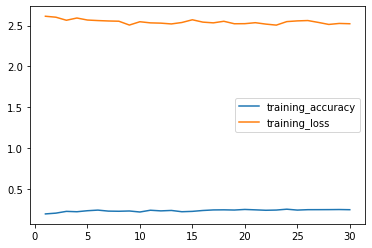

In [36]:
data=history.history
plt.plot(range(1,31),data['accuracy'],label="training_accuracy")
plt.plot(range(1,31),data['loss'],label="training_loss")
plt.legend()

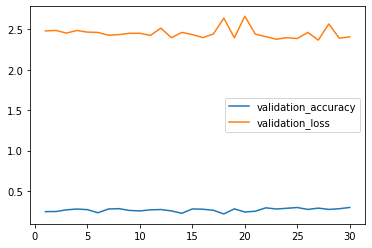

In [37]:
plt.plot(range(1,31),data['val_accuracy'],label="validation_accuracy")
plt.plot(range(1,31),data['val_loss'],label="validation_loss")
plt.legend()